### Altimetry Use Case example

##### Setup altimetry from probe data

In [2]:
from cfdmod.use_cases.altimetry import *
import pathlib
import trimesh
from cfdmod.utils import savefig_to_file

csv_path = pathlib.Path("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example/probes.csv") 
output_path = pathlib.Path("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example")
surface_mesh: trimesh.Trimesh = trimesh.load_mesh("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example/terrain.stl")

probes = AltimetryProbe.from_csv(csv_path)
sections = set([p.section_label for p in probes])
altimetry_list: list[AltimetrySection] = [] # For debug plotting purposes

for sec_label in sections:
    section_probes = [p for p in probes if p.section_label == sec_label]
    sheds_in_section = set([p.building_label for p in section_probes])
    shed_list: list[ShedProfile] = []
    
    for shed_label in sheds_in_section:
        building_probes = sorted(
            [p for p in section_probes if p.building_label == shed_label],
            key=lambda x: (x.coordinate[0], x.coordinate[1]),
        )
        shed = Shed(start_coordinate=building_probes[0].coordinate, end_coordinate=building_probes[1].coordinate)
        shed_list.append(shed)
 
    altimetry_section = AltimetrySection.from_points(sec_label, shed_list[0].start_coordinate, shed_list[0].end_coordinate)
    altimetry_section.slice_surface(surface_mesh)
    [altimetry_section.include_shed(s) for s in shed_list]
    
    filename = output_path / f"section-{altimetry_section.label}.png"
    fig, ax = plot_altimetry_profiles(altimetry_section)
    savefig_to_file(fig, filename)

    altimetry_list.append(altimetry_section)
    
## DEBUG PLOTS
# Save figure to output files
filename = output_path / "debug" / "surface.png"
fig, ax = plot_surface(surface_mesh, altimetry_list)
savefig_to_file(fig, filename)

filename = output_path / "debug" / "profiles.png"
fig, ax = plot_profiles(altimetry_list)
savefig_to_file(fig, filename)

##### Standard slicing from shed coordinates

NameError: name 'savefig_to_file' is not defined

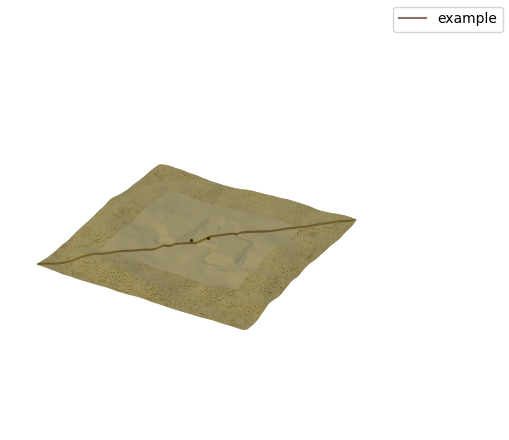

In [1]:
from cfdmod.use_cases.altimetry import AltimetrySection, Shed, plot_surface, plot_profiles, plot_altimetry_profiles
import trimesh
import numpy as np
import pathlib
from cfdmod.utils import savefig_to_file

output_path = pathlib.Path("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example")
surface_mesh: trimesh.Trimesh = trimesh.load_mesh("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example/terrain.stl")

shed_start = np.array([-50,-50,820], dtype=np.float32)
shed_end = np.array([50,50,820], dtype=np.float32)

shed = Shed(start_coordinate=shed_start, end_coordinate=shed_end)

altimetry_section = AltimetrySection.from_points("example", shed_start, shed_end)
altimetry_section.slice_surface(surface_mesh)
altimetry_section.include_shed(shed)

filename = output_path / "debug" / "surface.png"
fig, ax = plot_surface(surface_mesh, [altimetry_section])
savefig_to_file(fig, filename)

filename = output_path / "debug" / "profiles.png"
fig, ax = plot_profiles([altimetry_section])
savefig_to_file(fig, filename)

filename = output_path / f"section-{altimetry_section.label}.png"
fig, ax = plot_altimetry_profiles(altimetry_section)
savefig_to_file(fig, filename)

##### Generic Slicing from plane description

In [5]:
from cfdmod.use_cases.altimetry import plot_surface, plot_profiles, AltimetrySection
import trimesh
import numpy as np
import pathlib
from cfdmod.utils import savefig_to_file

output_path = pathlib.Path("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example")
surface_mesh: trimesh.Trimesh = trimesh.load_mesh("C:/Users/55419/Documents/GitHub/cfdmod/fixtures/use_cases/altimetry/project_example/case_example/terrain.stl")

plane_normal = np.array([1,0,0])
plane_origin = np.array([0,0,820])

altimetry_section = AltimetrySection("example", plane_origin, plane_normal)
altimetry_section.slice_surface(surface_mesh)

filename = output_path / "debug" / "surface.png"
fig, ax = plot_surface(surface_mesh, [altimetry_section])
savefig_to_file(fig, filename)

filename = output_path / "debug" / "profiles.png"
fig, ax = plot_profiles([altimetry_section])
savefig_to_file(fig, filename)